# Part 1: More SQL Baseball Data

Was unable to share the dataset after many tries. But have 6 queries using 4 datasets. Will upload images of each to show that they are working. Had datasets on 4 different types of baseball leagues/styles they are: all star games, world series games, league championship series games, and wild card games. Two of the queries below are where two dataset get combined and the rest are individual. Had to use this source to understand how big query worked and the syntax in the language https://cloud.google.com/bigquery/docs. Also used chatgpt to fix errors after being stuck on a problem for more than an hour. 

1st query: all_star baseball games
Used the dataset from the world_series games and all_star games to determine the number of Tuesday occurences in the games played

https://console.cloud.google.com/bigquery?project=scenic-edition-408201&supportedpurview=project&ws=!1m8!1m3!8m2!1s293429870512!2sdf76905cf94344f9ae75b4957f263135!1m3!3m2!1sscenic-edition-408201!2s123

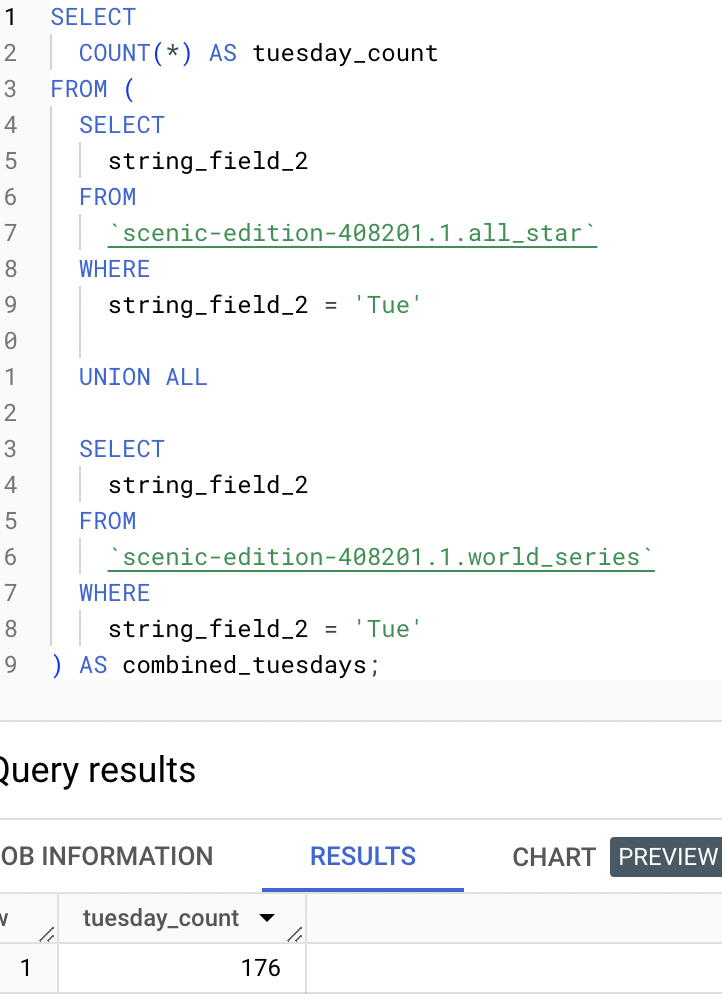



2nd query: all_star baseball games
Use COUNT function  and DESC in order to show the leagues and the number of games played in a descending order

https://console.cloud.google.com/bigquery?project=scenic-edition-408201&supportedpurview=project&ws=!1m8!1m3!8m2!1s293429870512!2s012540a76ca947cab1d27fb437f2c5ee!1m3!3m2!1sscenic-edition-408201!2s123

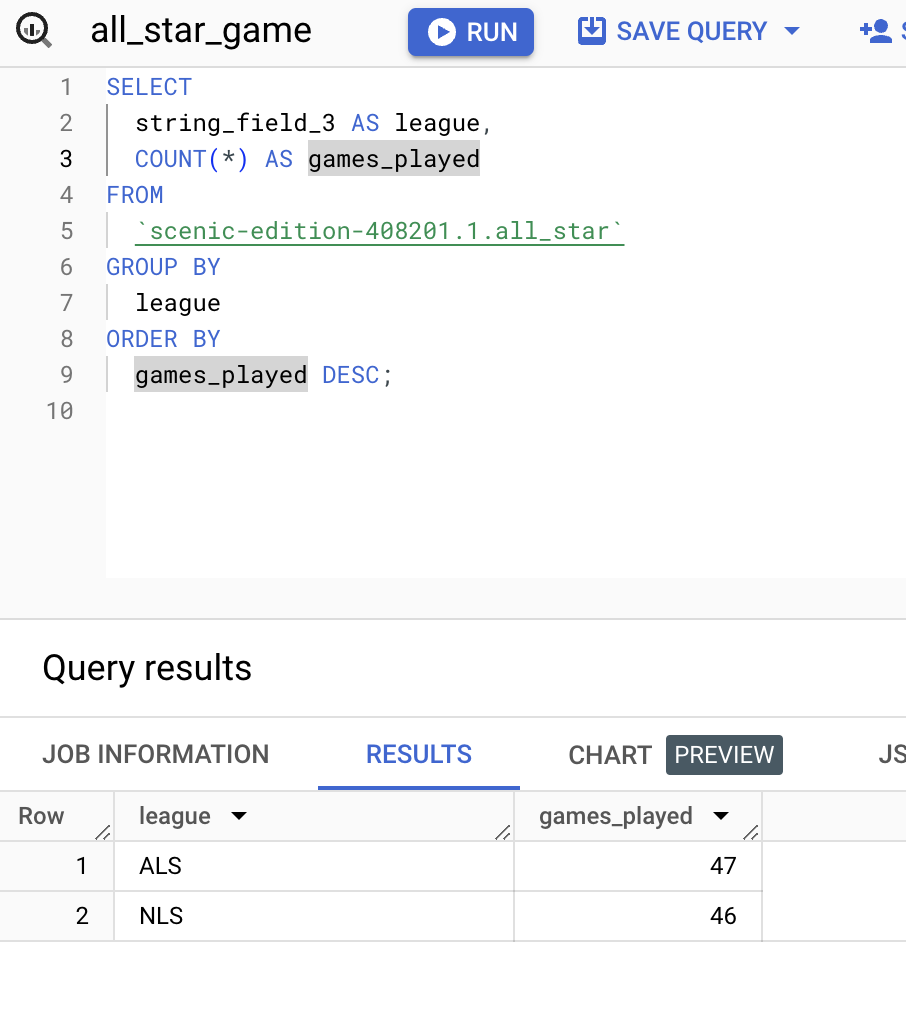



3rd query: all star and  world series
Lists the number of games played per days of the week. First uses the COUNT method, then selects as Days of the week and then combines the days and number of games played from both datasets

https://console.cloud.google.com/bigquery?project=scenic-edition-408201&supportedpurview=project&ws=!1m8!1m3!8m2!1s293429870512!2sc722b8db8d764a3f820edcc5339b4a15!1m3!3m2!1sscenic-edition-408201!2s123

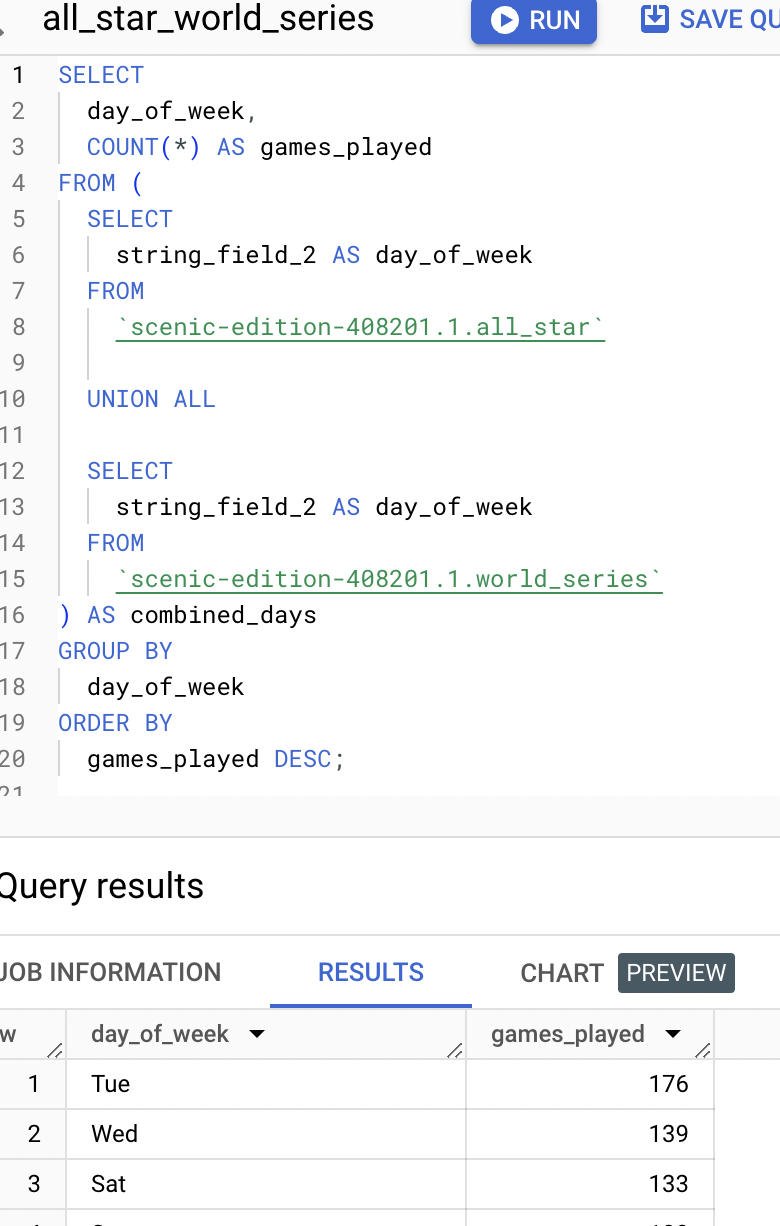

4th query:
lcs data
Shows the number of games play per week by specifi teams. Also added with the average score

https://console.cloud.google.com/bigquery?project=scenic-edition-408201&supportedpurview=project&ws=!1m8!1m3!8m2!1s293429870512!2s71fd9efd5d4c4a79a45e7f1b2666e1f4!1m3!3m2!1sscenic-edition-408201!2s123

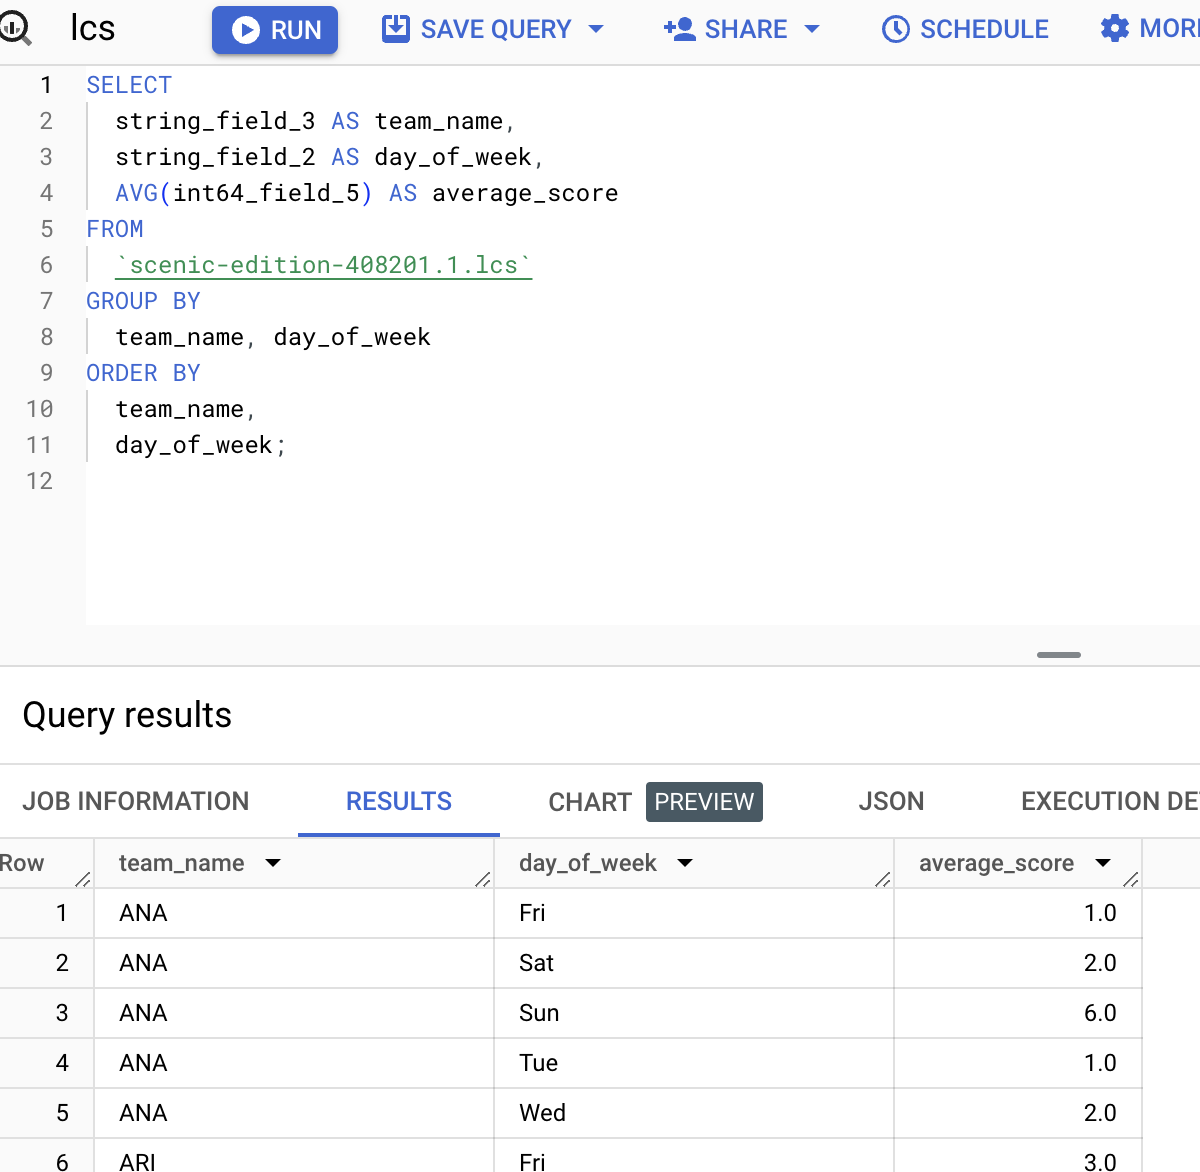

Query 5:
Wild_card games
calulates the average score using wild_card as average sore method

https://console.cloud.google.com/bigquery?project=scenic-edition-408201&supportedpurview=project&ws=!1m8!1m3!8m2!1s293429870512!2sb458bd47a80c4b0ba28045f7ff5760c0!1m3!3m2!1sscenic-edition-408201!2s123

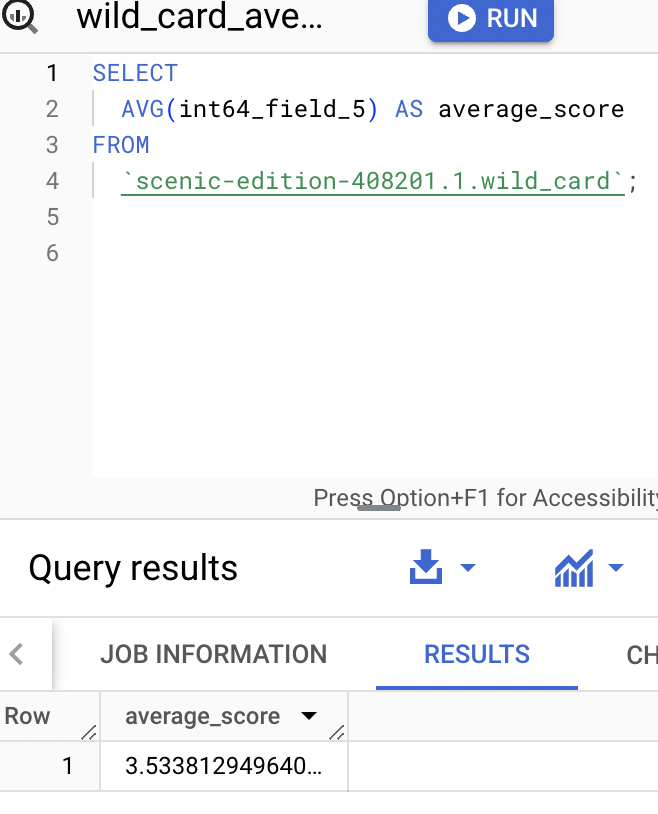

Part 6: World_series
Calculates the number of games played by every world_series team 

https://console.cloud.google.com/bigquery?project=scenic-edition-408201&supportedpurview=project&ws=!1m8!1m3!8m2!1s293429870512!2sf15255d6da114dc2958a2dbe9bf690b2!1m3!3m2!1sscenic-edition-408201!2s123

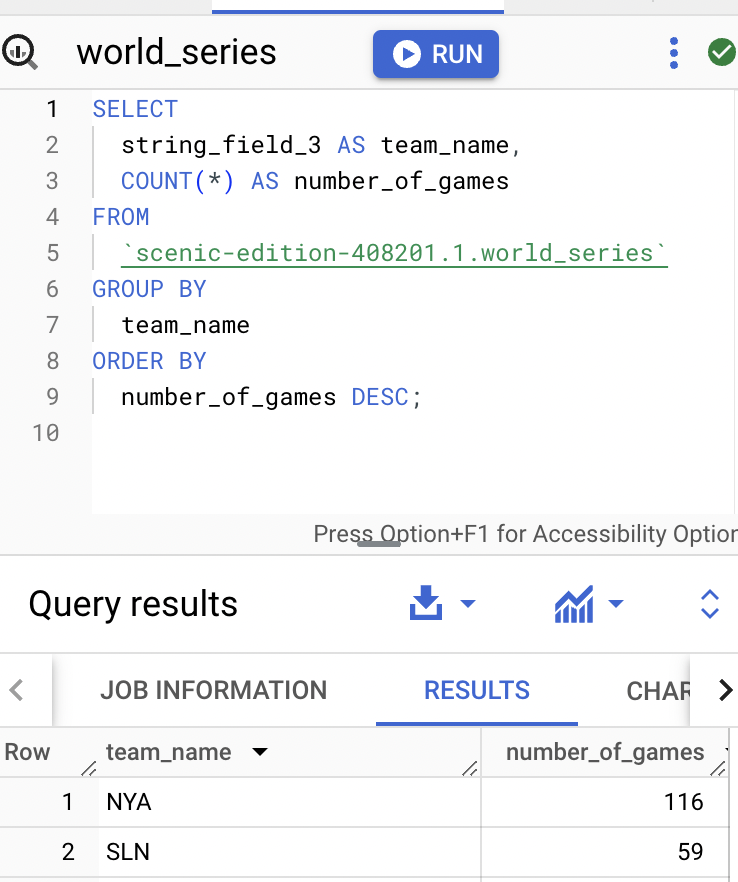

# Part 2: Analyzing Professor Wirfs Brock's location data

In [97]:
#imports the necessary library and the neccessary tools from the math module
import pandas as pd
from itertools import product
from math import radians, sin, cos, asin, sqrt

In [98]:
"""I was not sure what the Haversine Formula was so I had to look it up.
I came across this link https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
and use the method shown. """
#calculates distance between to points using longitude and latitude
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles.
    return c * r

In [99]:
# Loads Professor Wirf-Brocks location data
df = pd.read_csv('prof-W-B-location-edited.csv')


In [100]:
# Your chosen location's latitude and longitude random values
# Here I chose the longitude and latitude for the Walla Walla Indian Cuisine
chosen_lat = 46.039070
chosen_lon = -118.474731

In [101]:
# Used chatgpt here cause I was running into errors but this calculates distance
df['distance_to_chosen'] = df.apply(lambda row: haversine(chosen_lon, chosen_lat, row['lon'], row['lat']), axis=1)

In [102]:
# Save result
df.to_csv('processed_distances.csv', index=False)


In [103]:


# Sort the 'distance_to_chosen colulmn in ascending order'
df_sorted = df.sort_values('distance_to_chosen', ascending=True)

# Gets the row with the closest distance
closest_row = df_sorted.iloc[0]

# Gets the timestamp and the closest distanec both
closest_distance = closest_row['distance_to_chosen']
closest_timestamp = closest_row['timestamp']

# Display the results
print(f"Closest distance was {closest_distance} meters at timestamp:{closest_timestamp}.")


Closest distance was 9.74925423551686 meters at timestamp:2022-03-10 15:04:17.320000+00:00.


In [104]:
furthest_row = df_sorted.iloc[-1]  # Last row in the sorted dataframe
furthest_distance = furthest_row['distance_to_chosen']
furthest_timestamp = furthest_row['timestamp']
furthest_lat = furthest_row['lat']
furthest_lon = furthest_row['lon']

# Display the results for the furthest distance
print(f"The furthest distance was {furthest_distance} meters, which occurred at the timestamp {furthest_timestamp}.")
print(f"Location of the furthest point: Latitude {furthest_lat}, Longitude {furthest_lon}")

The furthest distance was 1314.9885031929084 meters, which occurred at the timestamp 2022-03-12 21:34:38.645000+00:00.
Location of the furthest point: Latitude 39.8425085, Longitude -104.6757271


Make a map of Profresso Wirfs-Brock's location using Observable. 

I have uploaded the link here: https://observablehq.com/d/1b0d908efd552d18

This is what the map looks like. I created a map of the United States that has a marker of the longitude and latitude coordinates on this map. This process took me a lot of time. I had never used observable and have never used javascript and therefore was very unfamiliar with this process. I started by uploading my csv dataset and then treid to write code to come up with a map but was unsuccessful. After hours I gave up and found a way to manually upload the dataset into observable in which I was successful. I then tried to use the dataset itself to plug in the coordinates to which I was unsuccessful. I then gave up and decided to manually upload the longitude and latitude coordinates. If given more time I would have found a more optimal way than this but this was the one I came up with in limits to the amount of time that I could finish on this projet. 

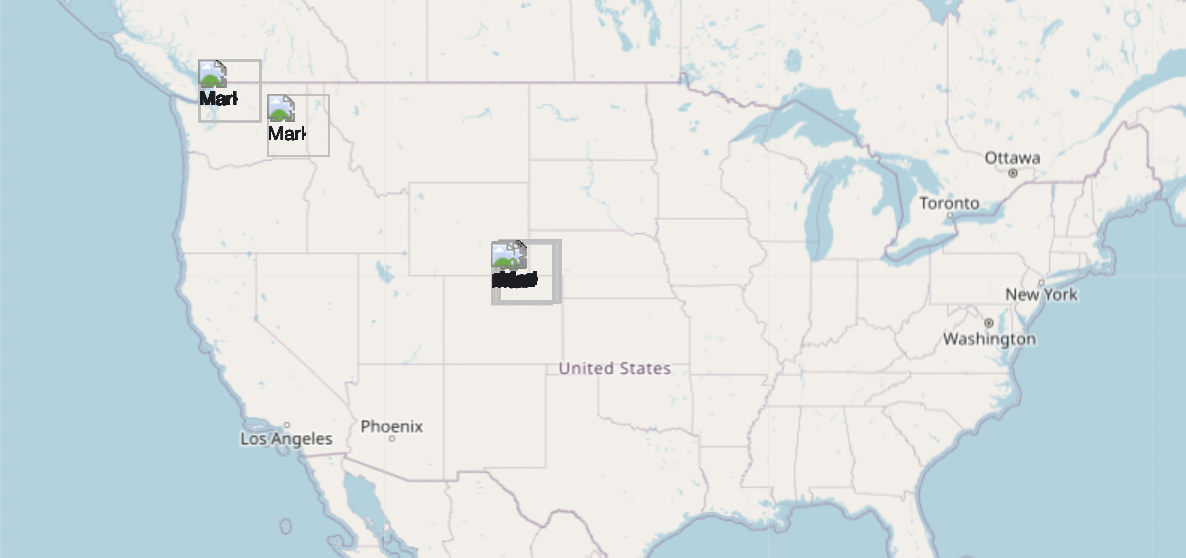

# Interesting observations about Professor Wirfs Brock's location data

It seems that Professor Wirfs-Brock travelling between two main states which are Washington State and Colordo.The location data ranged all the way from the Denver International Airport all the way to Whitman college. Throughout this journey she seems to have toured some interesting places in both Washingtons State and Denver. These places include: Stapleton neighborhood, downtown Denver, Seattle and Walla Walla. 

# Extra Credit Challenge: 

In [105]:
df2 = pd.read_csv('fixed_ruru-rajbhandari-location.csv')


In [106]:
#Spent hours trying to figure this out so got this from chatgpt
# Haversine formula to calculate distance
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r


# Cartesian product of the two datasets
cartesian_product = product(df2[['Lat', 'Long']].itertuples(index=False),
                            df[['lat', 'lon']].itertuples(index=False))

# Calculating distances
distances = []
for (lat_yours, long_yours), (lat_prof, long_prof) in cartesian_product:
    distance = haversine(long_yours, lat_yours, long_prof, lat_prof)
    distances.append((distance, lat_yours, long_yours, lat_prof, long_prof))

# Finding the closest and furthest distances
closest = min(distances, key=lambda x: x[0])
furthest = max(distances, key=lambda x: x[0])

print(f"Closest distance: {closest[0]:.2f} km")
print(f"Your location (closest): Latitude {closest[1]}, Longitude {closest[2]}")
print(f"Professor's location (closest): Latitude {closest[3]}, Longitude {closest[4]}")

print(f"Furthest distance: {furthest[0]:.2f} km")
print(f"Your location (furthest): Latitude {furthest[1]}, Longitude {furthest[2]}")
print(f"Professor's location (furthest): Latitude {furthest[3]}, Longitude {furthest[4]}")


Closest distance: 0.00 km
Your location (closest): Latitude 47.44478, Longitude -122.30378
Professor's location (closest): Latitude 47.4448126, Longitude -122.3037828
Furthest distance: 1648.59 km
Your location (furthest): Latitude 47.4439, Longitude -122.3479583
Professor's location (furthest): Latitude 39.8425085, Longitude -104.6757271
